In [243]:
import numpy as np
from scipy import special
import scipy.stats as st
import math
from statistics import stdev
import glob
import pandas as pd
from skimage import io
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import seaborn as sns
sns.set()
from jupyterthemes import get_themes
import jupyterthemes as jt
import matplotlib.image as mpimg
from PIL import Image
from jupyterthemes.stylefx import set_nb_theme
import os
set_nb_theme('oceans16')



### Constants

In [272]:
Q=135000
D0=1.5*10**-5
R=8.3145
T=1100+273.15
D=D0*np.exp(-Q/(R*T))
t=6*60*60
C0=0.76
x1=308.74*10**-6
c=x1/2

### Data

In [179]:
lengths=[c]
for i in range(1,17):
    lengths.append(i*x1+c)
#print(lengths)
imageJfrac=(0.2253,0.3309,0.4815,0.5955,0.6181,0.7568,0.7978,0.8415,0.8363,0.8401,0.8655,0.8430,0.8811,0.8694,0.8899,0.8929,0.8835)
imageJfrac2=(0.1435,0.3293,0.4772,0.5043,0.6285,0.7477,0.7608,0.8551,0.8165,0.8165,0.8577,0.8388,0.9242,0.8595,0.8835,0.8949,0.8894)
imageJfrac3=(0.13307,0.3416,0.4586,0.5448,0.6160,0.7212,0.7552,0.8468,0.7979,0.8163,0.8101,0.8620,0.8010,0.8443,0.8386,0.8625,0.8790)
imageJfrac4=(0.1411,0.282450,0.4008,0.4015,0.6200,0.7700,0.7320,0.8411,0.8139,0.8244,0.8204,0.8570,0.8210,0.8410,0.8742,0.8818,0.8830)
imageJfrac_avg=(np.array(imageJfrac)+np.array(imageJfrac2)+np.array(imageJfrac3)+np.array(imageJfrac4))/4

### Defining Ficks second law

In [180]:
fick_y_values=[]
def fick_predictions(x):
    test=C0*math.erf(x/(2*np.sqrt(D*t)))#math modules error function
    return (test)
for y in lengths:
    fick_y_values.append(fick_predictions(y))
#print(fick_y_values)
#len(fick_y_values)

### Real concentration values using lever rule

In [181]:
imageJconc=0.76*np.array(imageJfrac_avg)#lever rule
imageJconc

array([0.1221643, 0.2440075, 0.345439 , 0.388759 , 0.471694 , 0.569183 ,
       0.578702 , 0.643055 , 0.620274 , 0.626487 , 0.637203 , 0.646152 ,
       0.651187 , 0.648698 , 0.662378 , 0.671099 , 0.671631 ])

### Error Calculations

In [236]:
x_error=0.05*np.array(lengths_um)
y_error=[]
for i in range(17):
    y_error.append(stdev([0.76*imageJfrac[i],0.76*imageJfrac2[i],0.76*imageJfrac3[i],0.76*imageJfrac4[i]]))
#error bar values for the avg concnetration

In [255]:
RMSE = np.sqrt(((imageJconc - fick_y_values) ** 2).mean())
print(RMSE)
#rmse values

0.08496515741359481


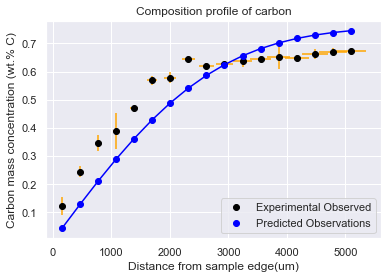

In [285]:
#NEED CONC ERROR BARS and x value error bars have like 1%
#WE ARE ASSUMING D is constant and does not change with concentration
#[::-1]

#MSE mean square error for goodness of fit
lengths_um=np.array(lengths)*10**6
a,=plt.plot(lengths_um,imageJconc, 'o', color='black', label='Experimental Observed')
b,=plt.plot(lengths_um,fick_y_values, 'o', color='blue', label='Predicted Observations')
c,=plt.plot(lengths_um,fick_y_values,color='blue')
xerr = x_error
yerr = y_error
plt.errorbar(lengths_um,imageJconc,xerr=xerr,yerr=yerr,fmt='none',ecolor='orange')
plt.xlabel('Distance from sample edge(um)')
plt.ylabel('Carbon mass concentration (wt.% C)')
plt.title('Composition profile of carbon')
plt.legend(handles=[a,b])
plt.legend(loc=4)
plt.savefig('plot.png')
plt.show()

### Back tracking to obtain D

In [280]:
def Get_D(x,c):
    D=(x**2)/((special.erfinv(c/0.76)**2*t*4))
    return(D)
D_values=[]
for i in range (len(lengths)):
    D_values.append(Get_D(lengths[i],imageJconc[i]))

In [282]:
D_avg=sum(D_values)/len(D_values)
print(D_avg)#avg D value
print(D)#theoretical D value

1.0872113339164961e-10
1.0985333331827306e-10


In [283]:
D_std=stdev(D_values)
Z_score=abs(D_avg-D)/D_std
p_values = stats.norm.sf(abs(Z_score))*2
p_values
#P value for null hypothesis

0.9874060840443696